In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score


In [83]:
df = pd.read_csv('Leads.csv')

In [84]:
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [86]:
df.shape

(9240, 37)

In [87]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','City']

df=df.drop(red_cols,axis=1)

In [88]:
# column names having label 'Select'

cols=list(df.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(df[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text 

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [89]:
# Replacing 'Select' label with nan values


df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', np.nan)
df['Lead Profile'] = df['Lead Profile'].replace('Select', np.nan)


In [90]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Get updates on DM Content                         0.0000

### We are dropping column who have null value > 35%

In [91]:
df = df.drop(['How did you hear about X Education','Lead Profile','Specialization','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Tags'],axis=1)  

In [92]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Magazine                                          0.0000

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   What is your current occupation                6550 

In [94]:
df.sample(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
7574,Landing Page Submission,Google,No,No,1,3.0,329,3.0,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,SMS Sent
5783,Landing Page Submission,Direct Traffic,No,No,1,15.0,1000,7.5,SMS Sent,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,SMS Sent
2276,API,Olark Chat,No,No,0,0.0,0,0.0,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
7466,Landing Page Submission,Direct Traffic,No,No,1,4.0,1025,4.0,SMS Sent,NaN,NaN,No,No,No,No,No,No,No,No,No,No,SMS Sent
7732,API,Google,No,No,0,2.0,75,2.0,Email Opened,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Email Opened
3217,API,Olark Chat,No,No,1,0.0,0,0.0,SMS Sent,NaN,NaN,No,No,No,No,No,No,No,No,No,No,SMS Sent
2764,Lead Add Form,Reference,No,No,1,0.0,0,0.0,SMS Sent,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
1917,API,Olark Chat,No,No,0,0.0,0,0.0,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
6417,Landing Page Submission,Organic Search,No,No,0,6.0,107,6.0,Email Opened,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Email Opened
6224,Landing Page Submission,Direct Traffic,No,No,0,2.0,213,2.0,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened


In [95]:
df_obj = df.select_dtypes(include=['object'])

In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_filled_arr = imputer.fit_transform(df_obj)


In [97]:
df_filled_arr

array([['API', 'Olark Chat', 'No', ..., 'No', 'No', 'Modified'],
       ['API', 'Organic Search', 'No', ..., 'No', 'No', 'Email Opened'],
       ['Landing Page Submission', 'Direct Traffic', 'No', ..., 'No',
        'No', 'Email Opened'],
       ...,
       ['Landing Page Submission', 'Direct Traffic', 'Yes', ..., 'No',
        'No', 'SMS Sent'],
       ['Landing Page Submission', 'Google', 'No', ..., 'No', 'No',
        'SMS Sent'],
       ['Landing Page Submission', 'Direct Traffic', 'No', ..., 'No',
        'No', 'Modified']], dtype=object)

In [98]:
df_filled = pd.DataFrame(df_filled_arr, columns=df_obj.columns)

In [99]:
df_filled.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
Last Notable Activity                            0
dtype: int64

In [100]:
df.update(df_filled)

In [101]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                            0
Receive More Updates About Our Courses        

In [102]:
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [103]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [104]:
df_obj = df.select_dtypes(include=['object'])
j = 0
for i in df_obj:
    print(df_obj.columns[j])
    print(df_obj[f'{i}'].unique())
    j += 1

Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked'
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
What is your current occupation
['Unemployed' 'Student' 'Working Professional' 'Businessman' 'Other'
 'Housewife']
What matters most to you in choosing a course
['Better Caree

In [105]:
pd.set_option('display.max_columns', None)
df.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified


In [106]:
df.shape

(9240, 22)

In [108]:
df['Lead Source'].value_counts()

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [109]:
df['Lead Source']=df['Lead Source'].apply(lambda x:x.capitalize())

df['Lead Source'].value_counts()

Lead Source
Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: count, dtype: int64

In [110]:
df = df.applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)

In [112]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   What is your current occupation                9240 

In [116]:
df_obj = df.select_dtypes(include=['object'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Last Activity                                  9240 non-null   object
 3   What is your current occupation                9240 non-null   object
 4   What matters most to you in choosing a course  9240 non-null   object
 5   Last Notable Activity                          9240 non-null   object
dtypes: object(6)
memory usage: 433.3+ KB


In [123]:
from sklearn.preprocessing import LabelEncoder

x = df_obj.columns
obj_col = list(x)

le = LabelEncoder()

for column in obj_col:
    df[column] = le.fit_transform(df[column])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   int32  
 1   Lead Source                                    9240 non-null   int32  
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   int32  
 9   What is your current occupation                9240 

In [127]:
# Set the display.max_rows option to None to display all rows
pd.set_option('display.max_rows', None)

corr_matrix = df.corr()
print(corr_matrix["Converted"].sort_values(ascending=False))

Converted                                        1.000000
Total Time Spent on Website                      0.362483
Last Activity                                    0.224844
Lead Origin                                      0.223725
What is your current occupation                  0.214057
Last Notable Activity                            0.210445
Lead Source                                      0.183237
TotalVisits                                      0.029119
Through Recommendations                          0.018607
Do Not Call                                      0.018581
Newspaper Article                                0.003465
Search                                          -0.002261
What matters most to you in choosing a course   -0.004727
Page Views Per Visit                            -0.005068
Digital Advertisement                           -0.005789
Newspaper                                       -0.008238
X Education Forums                              -0.008238
Do Not Email  

<Axes: >

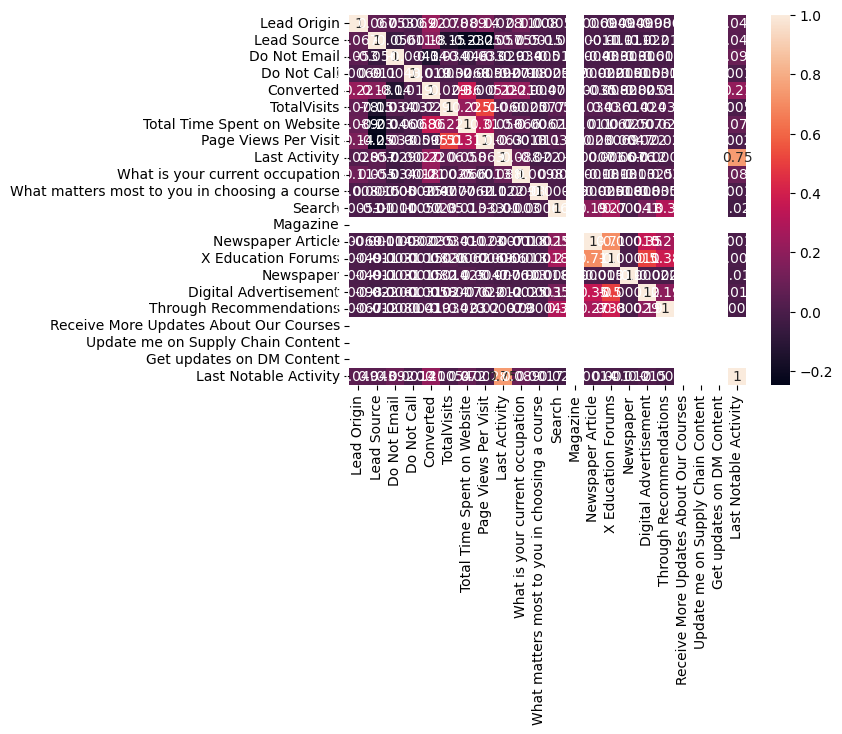

In [126]:
cm = df.corr()
sns.heatmap(cm,annot=True)

In [ ]:
# category={"No":0,"Yes":1}    # creating dictionary for two categories

# df['Do Not Email']=df['Do Not Email'].map(category)

# df['Do Not Call']=df['Do Not Call'].map(category)

# df['Search']=df['Search'].map(category)

# df['Magazine']=df['Magazine'].map(category)

# df['Newspaper Article']=df['Newspaper Article'].map(category)

# df['X Education Forums']=df['X Education Forums'].map(category)

# df['Newspaper']=df['Newspaper'].map(category)

# df['Digital Advertisement']=df['Digital Advertisement'].map(category)

# df['Through Recommendations']=df['Through Recommendations'].map(category)

# df['Receive More Updates About Our Courses']=df['Receive More Updates About Our Courses'].map(category)

# df['Update me on Supply Chain Content']=df['Update me on Supply Chain Content'].map(category)

# df['Get updates on DM Content']=df['Get updates on DM Content'].map(category)
